[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_05/blob/master/T05_CC--DJ--Statistics_Coding_Challenge_2.ipynb)

## Coding Challenge #2

In this coding challenge, we are going to use the "Index, Violent, Property, and Firearm Rates By County: Beginning 1990" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation).

There are a few objectives you need to accomplish:

1) Examine the data set for any missing values. The attributes of interest are 'Violent Count', 'Property Count', and 'Population'

2) If there are any missing values, replace it with the median for that specific attribute within the corresponding County.

For example if the 'Violent Count' attribute for the county of Albany has missing values, then replace it with the median of the 'Violent Count' for the county of Albany
Note: If there are no missing values, you can use the data set as is

3) Construct a box plot to surface the 25%, 50% and 75% percentiles of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

4) Compute the Variance and Standard Deviation of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

5) Contruct a Bee Swarm Plot to surface the spread of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

6) Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Population' vary together? Construct a scatter plot that plots the 'Violent Count' v/s the Total Population' for each of the 3 Counties. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

7) Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Property Count' vary together? Construct a scatter plot that plots the 'Violent Count' v/s the Total Property Count' for each of the 3 Counties. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

8) Compute the Correlation Coefficient between the 2 variable i.e. 'Violent Count' and the 'Population' for the county of Bronx


In [1]:
!curl -C - -O https://data.ny.gov/api/views/34dd-6g2j/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k    0   99k    0     0   129k      0 --:--:-- --:--:-- --:--:--  129k


In [2]:
!mv rows.csv?accessType=DOWNLOAD firearms_rows.csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('firearms_rows.csv')
df

,County,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
0,Albany,2016,308401.0,8764,2841.8,1102,357.3,7662,2484.4,126.0,40.9
1,Albany,2015,308613.0,8635,2798.0,1041,337.3,7594,2460.7,114.0,36.9
2,Albany,2014,308166.0,9181,2979.2,1003,325.5,8178,2653.8,147.0,47.7
3,Albany,2013,306300.0,9457,3087.5,1006,328.4,8451,2759.1,150.0,49.0
4,Albany,2012,305204.0,9975,3268.3,1012,331.6,8963,2936.7,137.0,44.9
5,Albany,2011,305571.0,10725,3509.8,1163,380.6,9562,3129.2,196.0,64.1
6,Albany,2010,295267.0,11036,3737.6,1182,400.3,9854,3337.3,154.0,52.2
7,Albany,2009,298400.0,10613,3556.6,1289,432.0,9324,3124.7,191.0,64.0
8,Albany,2008,299789.0,10750,3585.9,1356,452.3,9394,3133.5,238.0,79.4
9,Albany,2007,297154.0,10584,3561.8,1468,494.0,9116,3067.8,208.0,70.0


In [4]:
!git add . && git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   .ipynb_checkpoints/T05_CC--DJ--Statistics_Coding_Challenge_2-checkpoint.ipynb
	modified:   M05_A--DJ--Project_Assignment_1.ipynb
	modified:   T05_CC--DJ--Statistics_Coding_Challenge_2.ipynb
	new file:   firearms_rows.csv



In [5]:
!git commit -am "added loaded coding challenge with firearms_rows.csv dataset" && git push

[master 9933d9c] added loaded coding challenge with firearms_rows.csv dataset
 4 files changed, 2946 insertions(+), 78 deletions(-)
 create mode 100644 .ipynb_checkpoints/T05_CC--DJ--Statistics_Coding_Challenge_2-checkpoint.ipynb
 rewrite T05_CC--DJ--Statistics_Coding_Challenge_2.ipynb (94%)
 create mode 100644 firearms_rows.csv
Counting objects: 7, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 50.37 KiB | 2.40 MiB/s, done.
Total 7 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:schwaaweb/aimlds1_05.git
   489f872..9933d9c  master -> master
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


1) Examine the data set for any missing values. The attributes of interest are 'Violent Count', 'Property Count', and 'Population'

2) If there are any missing values, replace it with the median for that specific attribute within the corresponding County.

For example if the 'Violent Count' attribute for the county of Albany has missing values, then replace it with the median of the 'Violent Count' for the county of Albany Note: If there are no missing values, you can use the data set as is


In [18]:
df[['Violent Count', 'Property Count', 'Population']].isnull().sum()

Violent Count     0
Property Count    0
Population        0
dtype: int64

__There seem to be no missing values__

3) Construct a box plot to surface the 25%, 50% and 75% percentiles of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens



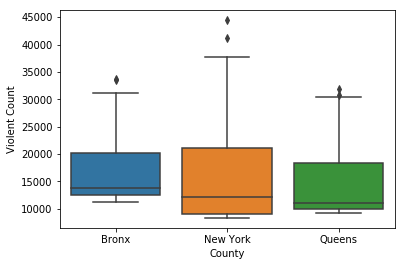

In [24]:
#sns.boxplot(x=['County'], y=['Violent Count'], data=df)
df_3Counties = df.loc[df['County'].isin(['Bronx','New York','Queens'])]
#ds_3Cities = ds.loc[ds['Death City'].isin(['NEW HAVEN','BROOKLYN','BRISTOL','HARTFORD'])]
#print(df_3Counties)

sns.boxplot(x='County', y='Violent Count', data=df_3Counties)
